In [1]:
import pandas as pd

# Load the third dataset
df_league = pd.read_csv('ScoreSight_ML_Season_LeagueWinner_Champion.csv')

# Print the first 5 rows to check
print("Successfully loaded League Winner dataset:")
print(df_league.head()) 

unwanted_cols = ['matches_played', 'wins', 'draws', 'losses', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 'target_league_position', 'target_top_4', 'target_top_6', 'target_relegated']
df_league_cleaned = df_league.drop(columns=unwanted_cols, errors='ignore') # Note: I changed df_goals_cleaned to df_match_cleaned

print("\nThis is the NEW, CLEANED dataframe:")
print(df_league_cleaned.head())

Successfully loaded League Winner dataset:
    season         team  matches_played  wins  draws  losses  points_per_game  \
0  2015-16  Bournemouth              38    11      9      18         1.105263   
1  2015-16      Norwich              38     9      7      22         0.894737   
2  2015-16   Man United              38    19      9      10         1.736842   
3  2015-16      Chelsea              38    12     14      12         1.315789   
4  2015-16      Everton              38    11     14      13         1.236842   

   goals_scored  goals_conceded  goal_difference  target_total_points  \
0          45.0            67.0            -22.0                   42   
1          39.0            67.0            -28.0                   34   
2          49.0            35.0             14.0                   66   
3          59.0            53.0              6.0                   50   
4          59.0            55.0              4.0                   47   

   target_league_position  targ

In [2]:
df_league_cleaned.to_excel('cleaned_league_data.xlsx', index=False)

In [3]:
print(df_league_cleaned.isnull().sum())

season                 0
team                   0
target_total_points    0
target_champion        0
dtype: int64


In [4]:
league_dupes = df_league_cleaned.duplicated().sum()
print(f"League Data has: {league_dupes} duplicate rows")

League Data has: 0 duplicate rows


In [5]:
print("\n--- League Data (Outlier Check) ---")
print(df_league_cleaned.describe())


--- League Data (Outlier Check) ---
       target_total_points  target_champion
count           180.000000       180.000000
mean             52.544444         0.050000
std              18.168769         0.218553
min              12.000000         0.000000
25%              40.000000         0.000000
50%              50.000000         0.000000
75%              66.000000         0.000000
max             100.000000         1.000000


Plotting boxplots for all 2 numeric columns in df_league:



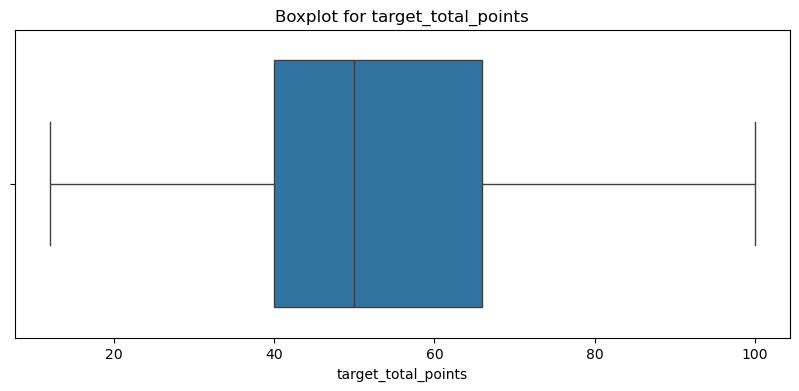

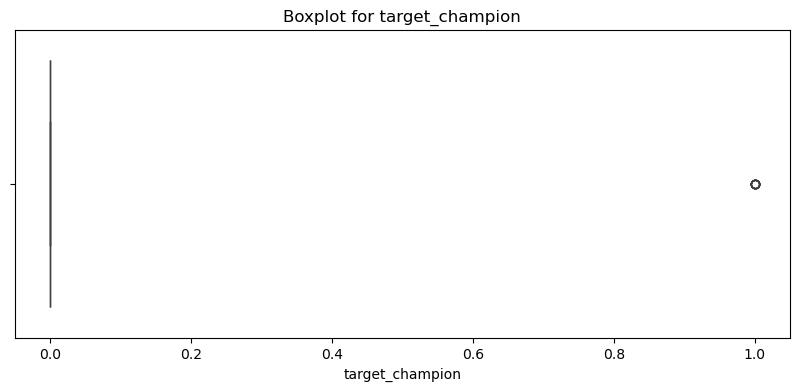


--- All numeric columns have been plotted. ---


In [8]:
import numpy as np
import matplotlib.pyplot as plt  # <-- Add this line
import seaborn as sns            # <-- Add this line

# Get a list of all columns that are numbers (int64 or float64)
# Make sure you are using the correct DataFrame name!
# I'm using 'df_league' from our previous examples.
numeric_cols = df_league_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_league:\n")

# Loop through each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 4)) # Create a new figure for each plot
    sns.boxplot(x=df_league_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

print("\n--- All numeric columns have been plotted. ---")

In [1]:
import pandas as pd
import numpy as np

# --- Main script ---
print("--- Processing League Data ---")
try:
    # 1. Load data
    df_league = pd.read_csv("ScoreSight_ML_Season_LeagueWinner_Champion.csv")
    print(f"Loaded {df_league.shape[0]} rows from ScoreSight_ML_Season_LeagueWinner_Champion.csv")

    # 2. Clean unwanted columns (from your notebook)
    unwanted_cols = [
        'matches_played', 'wins', 'draws', 'losses', 'points_per_game', 
        'goals_scored', 'goals_conceded', 'goal_difference', 
        'target_league_position', 'target_top_4', 'target_top_6', 'target_relegated'
    ]
    df_league_cleaned = df_league.drop(columns=unwanted_cols, errors='ignore')
    print("Cleaned unwanted columns.")

    # 3. Check for duplicates
    dupes = df_league_cleaned.duplicated().sum()
    print(f"Found {dupes} duplicates. No rows removed.")
    
    # 4. Outlier processing
    print("No outliers will be removed from this dataset.")
    print("Reason: The 'max' value (100 points) is a real, valid season.")
    
    # 5. Save to Excel
    league_excel_filename = "league_data_final.xlsx"
    # --- FIX: Save the cleaned version ---
    df_league_cleaned.to_excel(league_excel_filename, index=False)
    
    print(f"\nSuccessfully saved cleaned data to: {league_excel_filename}")

except FileNotFoundError:
    # --- FIX: Updated error message ---
    print("Error: 'ScoreSight_ML_Season_LeagueWinner_Champion.csv' not found.")
    print("Please make sure it's in the same directory as your notebook.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing League Data ---
Loaded 180 rows from ScoreSight_ML_Season_LeagueWinner_Champion.csv
Cleaned unwanted columns.
Found 0 duplicates. No rows removed.
No outliers will be removed from this dataset.
Reason: The 'max' value (100 points) is a real, valid season.

Successfully saved cleaned data to: league_data_final.xlsx


In [2]:
import pandas as pd
import numpy as np

# --- Main script ---
print("--- Categorical Analysis for League Data ---")

try:
    # 1. Analyze 'season'
    print("Unique 'season' values and their counts:")
    print(df_league['season'].value_counts())
    print("\n")

    # 2. Analyze 'team'
    print("Unique 'team' values and their counts:")
    print(df_league['team'].value_counts())
    print("\n")

    print("--- League categorical analysis complete ---")

except NameError:
    print("Error: 'df_league' not found.")
    print("Please run the 'process_league_data.py' script in a cell above this one first,")
    print("or load the 'league_data_final.xlsx' file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Categorical Analysis for League Data ---
Unique 'season' values and their counts:
season
2015-16    20
2017-18    20
2018-19    20
2019-20    20
2020-21    20
2021-22    20
2022-23    20
2023-24    20
2024-25    20
Name: count, dtype: int64


Unique 'team' values and their counts:
team
Chelsea             9
Man United          9
Arsenal             9
Everton             9
Newcastle           9
Tottenham           9
Man City            9
West Ham            9
Liverpool           9
Crystal Palace      9
Southampton         8
Brighton            8
Leicester           8
Aston Villa         7
Wolves              7
Bournemouth         7
Burnley             6
Watford             5
Fulham              5
Brentford           4
Norwich             3
Nott'm Forest       3
Leeds               3
West Brom           3
Sheffield United    3
Huddersfield        2
Stoke               2
Swansea             2
Sunderland          1
Cardiff             1
Luton               1
Ipswich             1
Name:

In [5]:
import pandas as pd
import numpy as np

# --- Main script ---
print("--- League Data: Relationship Analysis ---")

try:
    # 1. Load the data you just analyzed
    df_league = pd.read_excel("league_data_final.xlsx")
    print(f"Loaded 'league_data_final.xlsx': {df_league.shape}")

    # 2. Correlation
    print("\n--- Correlation (League Data) ---")
    # Select only numeric columns
    numeric_cols = df_league.select_dtypes(include=[np.number])
    print(numeric_cols.corr())

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Points by Team (Top 10) ---")
    team_points = df_league.groupby('team')['target_total_points'].mean()
    print(team_points.sort_values(ascending=False).head(10))

    print("\n--- Average Points by Team (Bottom 10) ---")
    print(team_points.sort_values(ascending=True).head(10))
    
    print("\n--- League relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'league_data_final.xlsx' not found.")
    print("Please make sure you have successfully run 'process_league_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- League Data: Relationship Analysis ---
Loaded 'league_data_final.xlsx': (180, 4)

--- Correlation (League Data) ---
                     target_total_points  target_champion
target_total_points             1.000000         0.489744
target_champion                 0.489744         1.000000

--- Average Points by Team (Top 10) ---
team
Man City      86.111111
Liverpool     80.555556
Arsenal       70.777778
Man United    65.333333
Chelsea       63.888889
Tottenham     63.777778
Leicester     52.375000
Newcastle     51.222222
West Ham      50.111111
Brentford     50.000000
Name: target_total_points, dtype: float64

--- Average Points by Team (Bottom 10) ---
team
Ipswich             22.000000
Norwich             25.666667
Luton               26.000000
Huddersfield        26.500000
Sheffield United    31.000000
West Brom           33.333333
Cardiff             34.000000
Watford             38.600000
Southampton         38.750000
Sunderland          39.000000
Name: target_total_points, dt

In [6]:
df_league.to_excel('league_data_final.xlsx', index=False)

--- Building Classification Model for 'League Champion' ---
Loaded 'league_data_final.xlsx': (180, 4)
Feature engineering complete.
Training data shape: (144, 40)
Testing data shape: (36, 40)
Test set 'winner' count: 2 (out of 9 total)
Data has been scaled.

Training LogisticRegression model...
Model training complete.

--- Model Evaluation (League Champion) ---
Model Accuracy: 97.22%

--- Classification Report ---
                  precision    recall  f1-score   support

Not Champion (0)       0.97      1.00      0.99        34
    Champion (1)       1.00      0.50      0.67         2

        accuracy                           0.97        36
       macro avg       0.99      0.75      0.83        36
    weighted avg       0.97      0.97      0.97        36


** 'recall' for 'Champion (1)' is our most important score! **

Area Under the Curve (AUC) Score: 1.00

Plotting Confusion Matrix...


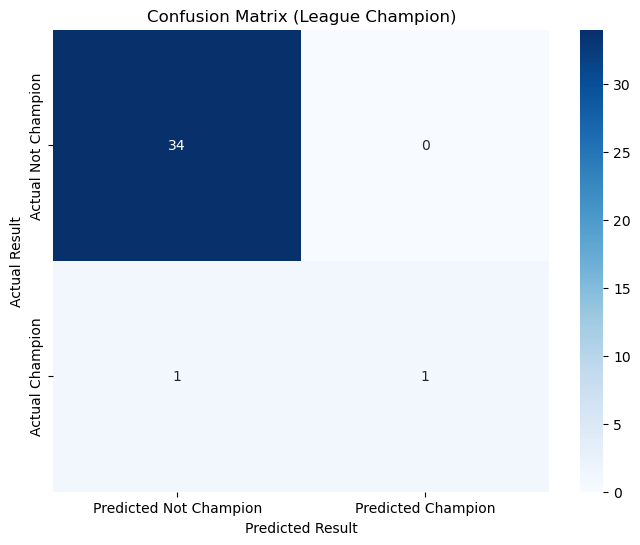


Plotting ROC-AUC Curve...


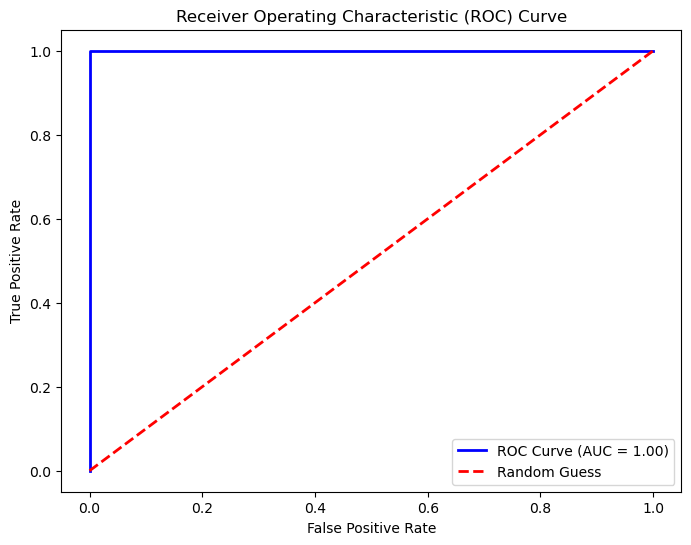

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score # <-- Added ROC imports
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Building Classification Model for 'League Champion' ---")

try:
    # 1. Load the clean data
    df = pd.read_excel("league_data_final.xlsx")
    print(f"Loaded 'league_data_final.xlsx': {df.shape}")

    # 2. Feature Engineering
    # Our target 'y' is 'target_champion'
    y = df['target_champion']
    
    # Our features 'X' are the 'season' and 'team'
    # We must convert these text columns to numbers
    X = pd.get_dummies(df.drop(columns=['target_champion']), drop_first=True)
    
    print("Feature engineering complete.")

    # 3. Train-Test Split (with STRATIFY)
    # stratify=y is CRITICAL for imbalanced data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print(f"Test set 'winner' count: {y_test.sum()} (out of 9 total)")

    # 4. Scale the Data
    # Not strictly necessary for this data, but good practice
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data has been scaled.")

    # 5. Train the Model (with CLASS_WEIGHT)
    print("\nTraining LogisticRegression model...")
    
    # class_weight='balanced' tells the model to pay extra attention
    # to the rare '1' class.
    model_league = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
    model_league.fit(X_train_scaled, y_train)
    print("Model training complete.")

    # 6. Make Predictions
    y_pred = model_league.predict(X_test_scaled)
    
    # 7. Evaluate the Model
    print("\n--- Model Evaluation (League Champion) ---")
    
    # Accuracy (we know this is a bad metric here, but good to see)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Classification Report (This is the IMPORTANT metric)
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred, target_names=['Not Champion (0)', 'Champion (1)']))
    print("\n** 'recall' for 'Champion (1)' is our most important score! **")

    # --- NEW: ROC-AUC Score ---
    y_pred_proba = model_league.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nArea Under the Curve (AUC) Score: {auc:.2f}")

    # 8. Visual Evaluation: Confusion Matrix
    print("\nPlotting Confusion Matrix...")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Not Champion', 'Predicted Champion'], 
                yticklabels=['Actual Not Champion', 'Actual Champion'])
    plt.ylabel('Actual Result')
    plt.xlabel('Predicted Result')
    plt.title('Confusion Matrix (League Champion)')
    plt.show()

    # --- NEW: 9. Plot ROC-AUC Curve ---
    print("\nPlotting ROC-AUC Curve...")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

except FileNotFoundError:
    print("Error: 'league_data_final.xlsx' not found.")
    print("Please make sure you have successfully run 'process_league_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Building Linear Regression Model for 'Total Points' ---
Loaded 'league_data_final.xlsx': (180, 4)
Feature engineering complete.
Training data shape: (144, 39)
Testing data shape: (36, 39)
Data has been scaled.

Training LinearRegression model...
Model training complete.

--- Model Evaluation (Linear Regression for Points) ---
Mean Absolute Error (MAE): 11.64
Mean Squared Error (MSE): 233.30
Root Mean Squared Error (RMSE): 15.27
R-squared (R²): 0.32

This model is, on average, off by 11.64 points when making a prediction.

Plotting actual vs. predicted values...


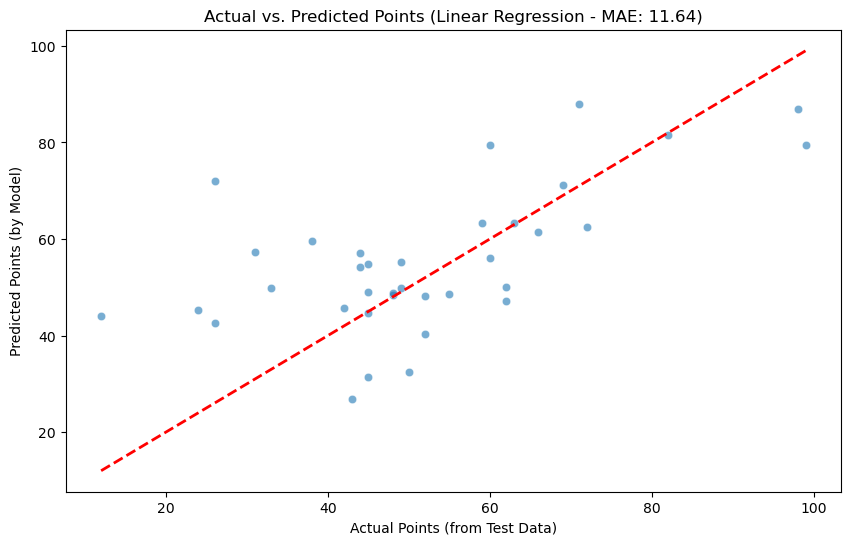

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# --- Main script ---
print("--- Building Linear Regression Model for 'Total Points' ---")

try:
    # 1. Load the clean data
    df = pd.read_excel("league_data_final.xlsx")
    print(f"Loaded 'league_data_final.xlsx': {df.shape}")

    # 2. Define Features (X) and Target (y)
    target = 'target_total_points'
    y = df[target]
    
    # We will use 'season' and 'team' to predict the points
    # We drop the champion column as it's a *result* of points, not a predictor
    X_features = df.drop(columns=['target_total_points', 'target_champion'])
    
    # Convert 'season' and 'team' to numbers
    X = pd.get_dummies(X_features, drop_first=True)
    
    print("Feature engineering complete.")

    # 3. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    # 4. Scale the Data
    # Not strictly necessary for this model, but good practice
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data has been scaled.")

    # 5. Train the Model
    print("\nTraining LinearRegression model...")
    model_points = LinearRegression(n_jobs=-1)
    model_points.fit(X_train_scaled, y_train)
    print("Model training complete.")

    # 6. Make Predictions
    y_pred = model_points.predict(X_test_scaled)
    
    # 7. Evaluate the Model
    print("\n--- Model Evaluation (Linear Regression for Points) ---")
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared (R²): {r2:.2f}")
    
    print(f"\nThis model is, on average, off by {mae:.2f} points when making a prediction.")

    # 8. Visual Evaluation: Actual vs. Predicted
    print("\nPlotting actual vs. predicted values...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Points (from Test Data)")
    plt.ylabel("Predicted Points (by Model)")
    plt.title(f"Actual vs. Predicted Points (Linear Regression - MAE: {mae:.2f})")
    plt.show()

except FileNotFoundError:
    print("Error: 'league_data_final.xlsx' not found.")
    print("Please make sure you have successfully run 'process_league_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")